In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
import itertools
import community as community_louvain
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    #print(graph.nodes(data=True))
    #plot_node_types(graph)
    print('nodeid',nodeid)
    print('node count',len(nodes))
    print('edge count',len(edges))
    return graph

In [40]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [41]:
def plot_node_types(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show()

In [42]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [43]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

In [51]:
#For IMDB, remove the Genre node type
def remove_genre_nodes(graph):
    nodeId_list = []
    node_type_list = []
    for key, value in graph.nodes(data=True):
        nodeId_list.append(key)
        node_type_list.append(value['class'])


    df_graph = pd.DataFrame()
    df_graph["nodeId"] = nodeId_list
    df_graph["class"] = node_type_list 
    node3_list = list(df_graph[df_graph['class'] == 3]['nodeId'])

    df_edges = nx.to_pandas_edgelist(graph)
    df_edges = df_edges[['source','target']]
    df_edges = df_edges[~df_edges['source'].isin(node3_list)]
    df_edges= df_edges[~df_edges['target'].isin(node3_list)]
    
    small_graph = nx.from_pandas_edgelist(
    df_edges,

    create_using=nx.Graph(),
)
    node_class = df_graph[['nodeId','class']]
    nodes_attr = node_class.set_index('nodeId').to_dict(orient = 'index')
    nx.set_node_attributes(small_graph, nodes_attr)
    
    return small_graph

In [52]:
G_syn_imdb = nx.read_gexf("IMDB_movie_hgen.gexf")

[('1646', {'class': 3, 'label': '1646'}), ('1636', {'class': 3, 'label': '1636'}), ('7', {'class': 0, 'label': '7'}), ('1011', {'class': 2, 'label': '1011'}), ('1649', {'class': 3, 'label': '1649'}), ('1642', {'class': 3, 'label': '1642'}), ('1166', {'class': 2, 'label': '1166'}), ('1635', {'class': 3, 'label': '1635'})]
nodeid 7
node count 8
edge count 11
[('7', {'class': 0}), ('1011', {'class': 2}), ('1166', {'class': 2})]


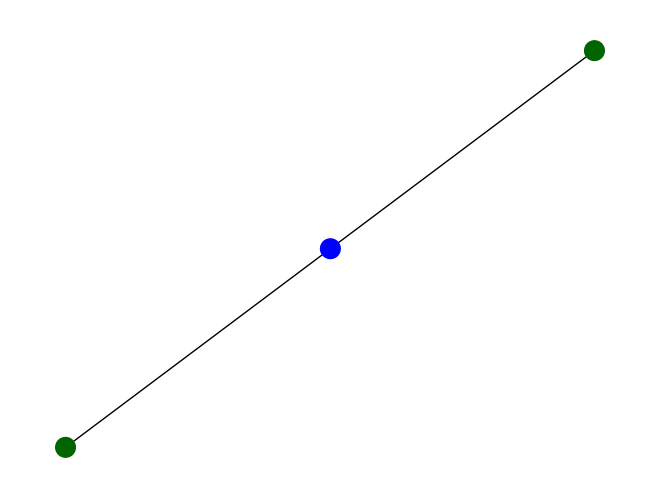

In [54]:
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[0]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
plot_node_types(syn_small_graph)

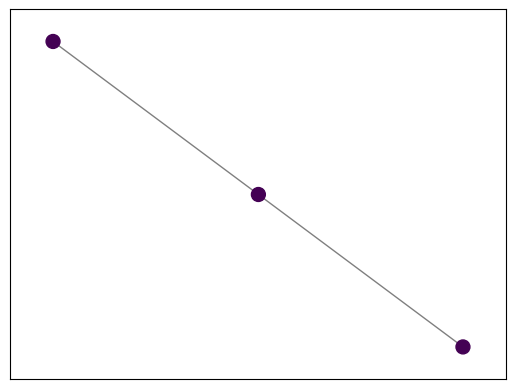

[{'1011', '7', '1166'}]


In [59]:
detect_community(syn_small_graph)
list_com= nx.community.louvain_communities(syn_small_graph, seed=123)
print(list_com)

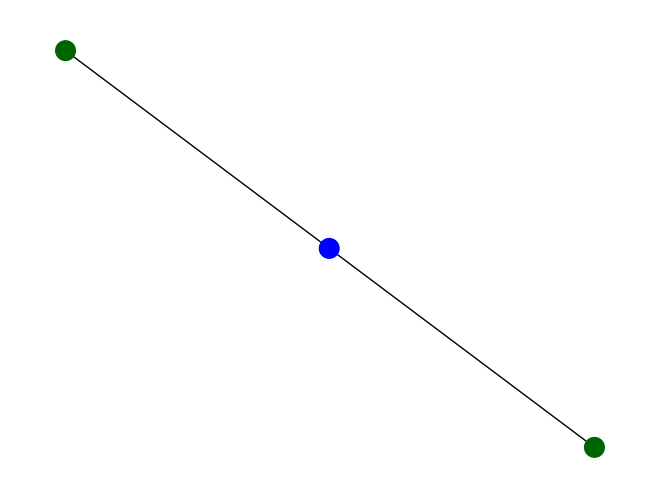

In [60]:
#Largest substructure
H = syn_small_graph.subgraph(max(list_com, key=len))
plot_node_types(H)

[('1329', {'class': 2, 'label': '1329'}), ('1540', {'class': 2, 'label': '1540'}), ('1634', {'class': 3, 'label': '1634'}), ('1644', {'class': 3, 'label': '1644'}), ('1480', {'class': 2, 'label': '1480'}), ('86', {'class': 0, 'label': '86'}), ('1633', {'class': 3, 'label': '1633'})]
nodeid 86
node count 7
edge count 8
[('1329', {'class': 2}), ('1480', {'class': 2}), ('1540', {'class': 2}), ('86', {'class': 0})]


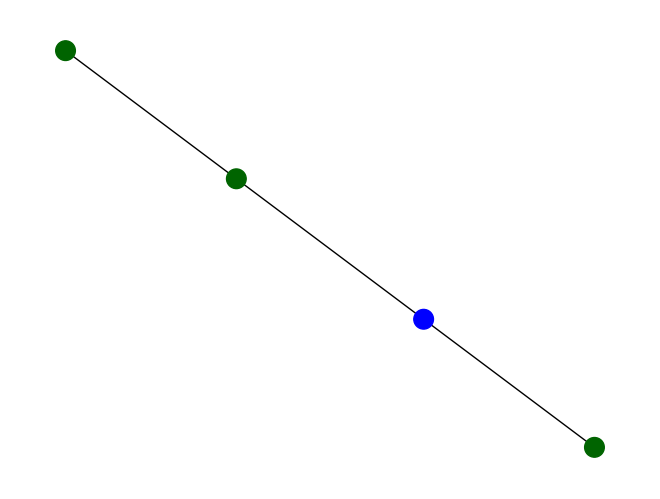

In [61]:
node_id = list(node_subset_syn.keys())[1]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
plot_node_types(syn_small_graph)

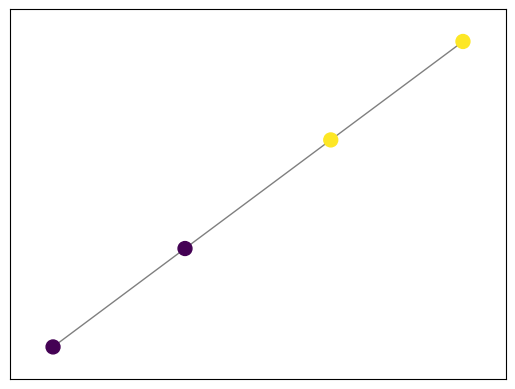

[{'1329', '1480'}, {'86', '1540'}]


In [62]:
detect_community(syn_small_graph)
list_com= nx.community.louvain_communities(syn_small_graph, seed=123)
print(list_com)

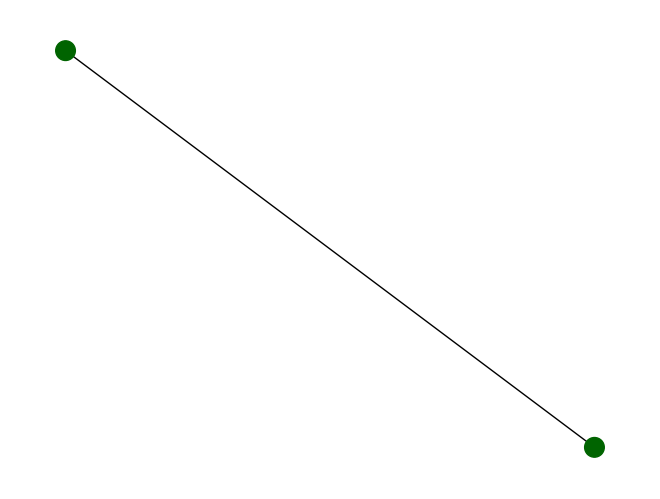

In [63]:
#Largest substructure
H = syn_small_graph.subgraph(max(list_com, key=len))
plot_node_types(H)

[('1651', {'class': 3, 'label': '1651'}), ('1630', {'class': 3, 'label': '1630'}), ('1639', {'class': 3, 'label': '1639'}), ('95', {'class': 0, 'label': '95'}), ('1634', {'class': 3, 'label': '1634'}), ('1637', {'class': 3, 'label': '1637'}), ('1343', {'class': 2, 'label': '1343'}), ('1632', {'class': 3, 'label': '1632'}), ('1641', {'class': 3, 'label': '1641'})]
nodeid 95
node count 9
edge count 13
[('95', {'class': 0}), ('1343', {'class': 2})]


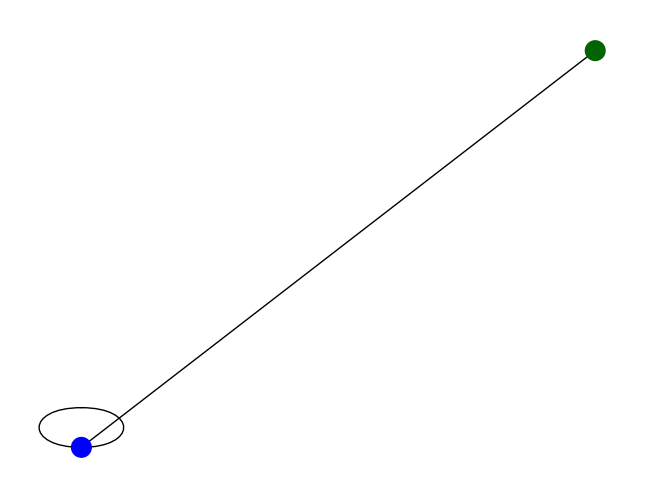

In [66]:
node_id = list(node_subset_syn.keys())[2]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
plot_node_types(syn_small_graph)

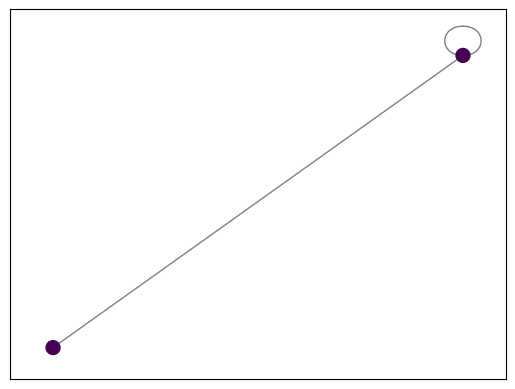

[{'1343', '95'}]


In [67]:
detect_community(syn_small_graph)
list_com= nx.community.louvain_communities(syn_small_graph, seed=123)
print(list_com)

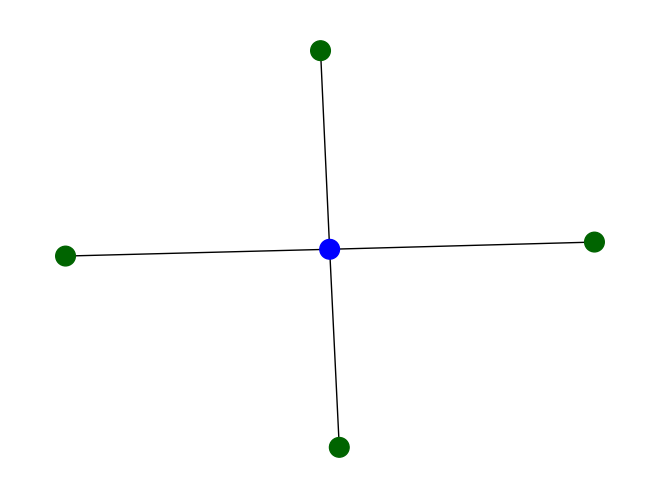

In [16]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

[('1636', {'class': 3, 'label': '1636'}), ('727', {'class': 1, 'label': '727'}), ('1536', {'class': 2, 'label': '1536'}), ('959', {'class': 2, 'label': '959'}), ('1649', {'class': 3, 'label': '1649'}), ('1388', {'class': 2, 'label': '1388'}), ('1635', {'class': 3, 'label': '1635'})]
nodeid 727
node count 7
edge count 9
[('727', {'class': 1}), ('1388', {'class': 2}), ('1536', {'class': 2}), ('959', {'class': 2})]


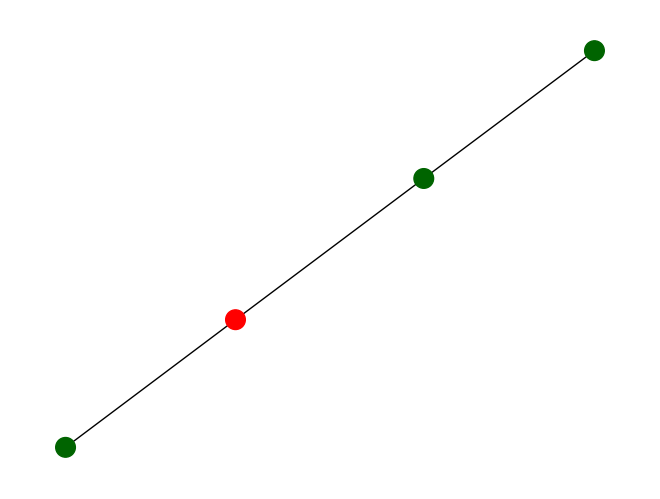

In [83]:
node_id = list(node_subset_syn.keys())[34]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
plot_node_types(syn_small_graph)

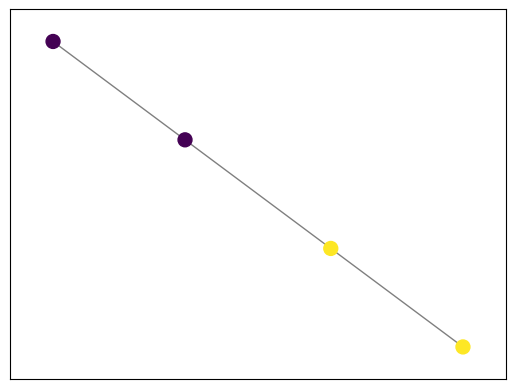

[{'727', '1388'}, {'959', '1536'}]


In [84]:
detect_community(syn_small_graph)
list_com= nx.community.louvain_communities(syn_small_graph, seed=123)
print(list_com)

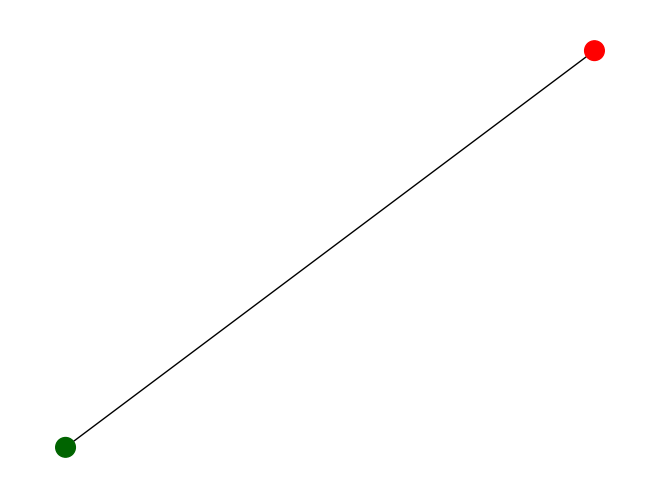

In [85]:
#Largest substructure
H = syn_small_graph.subgraph(max(list_com, key=len))
plot_node_types(H)

[('1631', {'class': 3, 'label': '1631'}), ('1639', {'class': 3, 'label': '1639'}), ('1493', {'class': 2, 'label': '1493'}), ('875', {'class': 1, 'label': '875'}), ('1169', {'class': 2, 'label': '1169'}), ('1634', {'class': 3, 'label': '1634'}), ('1104', {'class': 2, 'label': '1104'}), ('1650', {'class': 3, 'label': '1650'}), ('640', {'class': 1, 'label': '640'}), ('1635', {'class': 3, 'label': '1635'})]
nodeid 875
node count 10
edge count 11
[('1493', {'class': 2}), ('640', {'class': 1}), ('875', {'class': 1}), ('1104', {'class': 2}), ('1169', {'class': 2})]


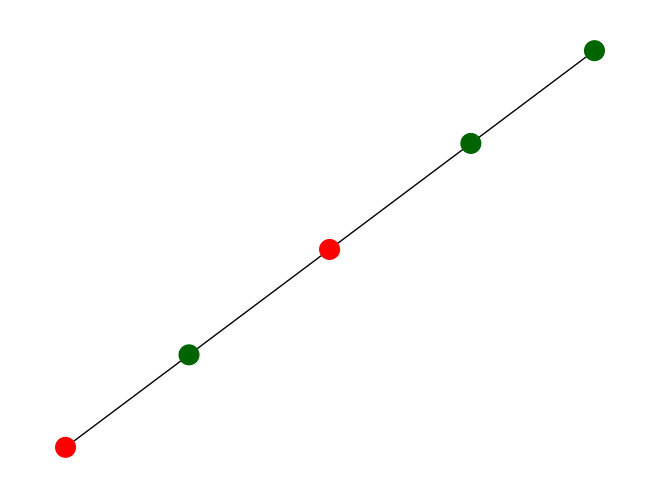

In [86]:
node_id = list(node_subset_syn.keys())[38]
twohop = graph_gen(node_id, G_syn_imdb)
syn_small_graph = remove_genre_nodes(twohop)
print(syn_small_graph.nodes(data=True))
plot_node_types(syn_small_graph)

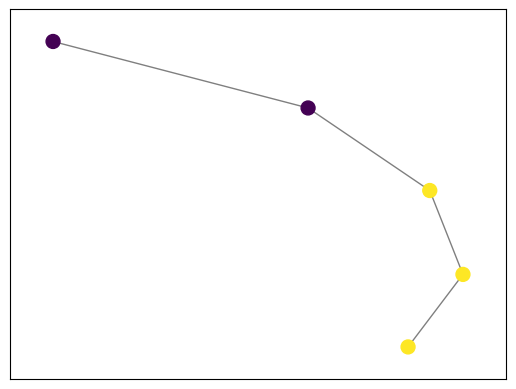

[{'640', '1493', '875'}, {'1169', '1104'}]


In [87]:
detect_community(syn_small_graph)
list_com= nx.community.louvain_communities(syn_small_graph, seed=123)
print(list_com)

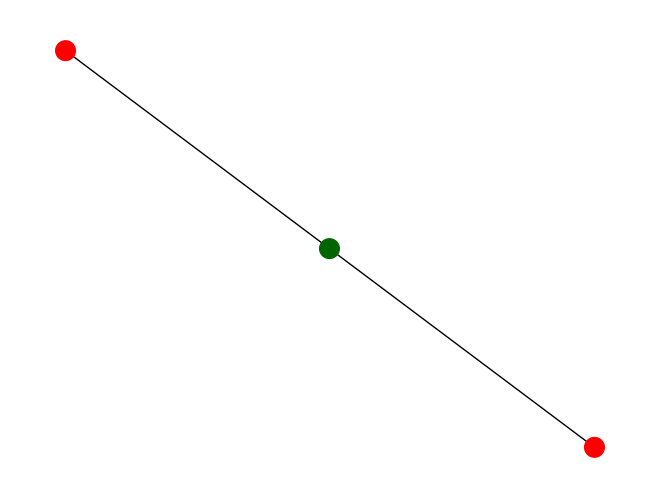

In [88]:
#Largest substructure
H = syn_small_graph.subgraph(max(list_com, key=len))
plot_node_types(H)